<a href="https://colab.research.google.com/github/Sarvesh1814/HateXplain/blob/main/Embeddings(Word2Vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import spacy
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Reproducibility/Sample Model/HateXplain2.csv")

In [4]:
df = df[['post_tokens',	'Target_cat',	'Label_cat',	'final_rationales']]
df['post_tokens'] = df['post_tokens'].apply(lambda x: eval(x))
df.head()

,post_tokens,Target_cat,Label_cat,final_rationales
0,"[i, dont, think, im, getting, my, baby, them, ...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[we, cannot, continue, calling, ourselves, fem...",None,normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[nawt, yall, niggers, ignoring, me]",African,normal,"[0, 0, 0, 0, 0]"
3,"[<user>, i, am, bit, confused, coz, chinese, p...",Asian,hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[this, bitch, in, whataburger, eating, a, burg...",Women,hatespeech,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [5]:
corpus = [tokenized_tweet for tokenized_tweet in df['post_tokens']]


# Word2Vec Approach

In [10]:
model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=5, workers=4)


In [11]:
model.wv.most_similar('terrorist') # find words similar to 'word'

[('invasion', 0.9820294976234436),
 ('rapes', 0.9736006259918213),
 ('united', 0.9712393879890442),
 ('attack', 0.9692821502685547),
 ('blames', 0.9670650959014893),
 ('migrant', 0.9666737914085388),
 ('gangs', 0.9648115038871765),
 ('sexual', 0.9646287560462952),
 ('party', 0.9644081592559814),
 ('founded', 0.9626800417900085)]

In [14]:
model.save('word2vec_HateXplain.bin')

In [17]:
from gensim.models import KeyedVectors

from gensim.models import Word2Vec

model = KeyedVectors.load('/content/word2vec_HateXplain.bin')

# Extract most frequent words from the model
words = [word for word, freq in model.wv.key_to_index.items() if freq > 100]


# Generate word cloud
wordcloud = WordCloud().generate(' '.join(words))


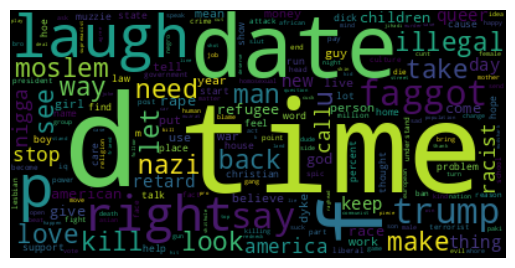

In [18]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
embeddings = []
words = []
for word in model.wv.key_to_index.items():
    embeddings.append(model.wv[word])
    words.append(word)

embeddings = np.array(embeddings)

In [ ]:
import os

# Define the output directory
output_dir = '/content/drive/MyDrive/Reproducibility/Sample Model'

# Save the embeddings to a file
np.savetxt(os.path.join(output_dir, 'embeddings.tsv'), embeddings, delimiter='\t')

# Save the words to a file
with open(os.path.join(output_dir, 'metadata.tsv'), 'w') as f:
    f.write('Word\n')
    for word in words:
        f.write('{}\n'.format(word))

In [ ]:
import io

embeddings = model.wv.vectors
word_index = {word: model.wv.vocab[word].index for word in model.wv.vocab}
out_v = io.open('/content/drive/MyDrive/Reproducibility/Sample Model/embeddings.tsv', 'w', encoding='utf-8')
out_m = io.open('/content/drive/MyDrive/Reproducibility/Sample Model/metadata.tsv', 'w', encoding='utf-8')

for word, index in word_index.items():
    vec = embeddings[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")

out_v.close()
out_m.close()

Use this [Embeddings Projector](https://projector.tensorflow.org/) to visualise the embedding in 3D

**This is the view of Embedding projections**

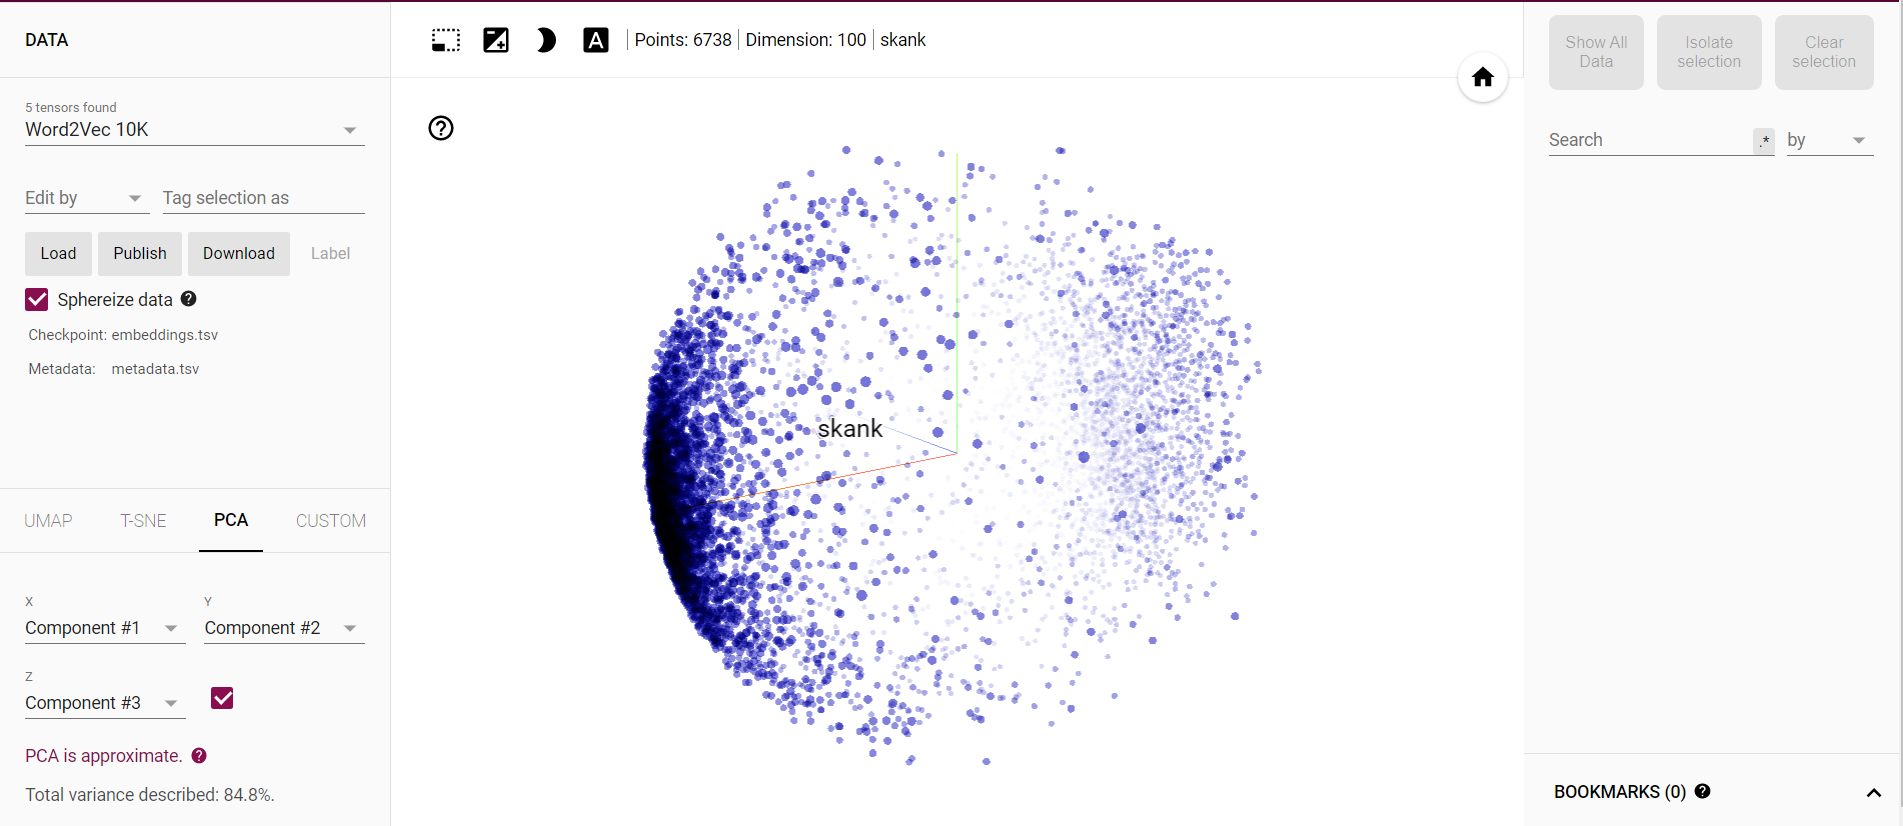